# Introducción

En esta práctica vamos a repasar diferentes tests estadísticos. Para ello nos ayudamos de los datos publicados por BCSC:
*NCI-funded Breast Cancer Surveillance Consortium (P01 CA154292 and HHSN261201100031C). Downloaded mm/dd/yyyy from the Breast Cancer Surveillance Consortium Web site - http://www.bcsc-research.org/data/index.html.*

Concretamente a través de este enlace:
http://www.bcsc-research.org/data/rf/app2/DownloadRequest.aspx


El fichero *BCSC_risk_factors_summarized.csv* descargado lo teneis en la carpeta *data*.

Ese fichero es un CSV, la descripción de cada columna se puede ver en la siguiente tabla:


| Nombre de variable | Descripción | Código | 
|-|-|-|
| year | Año de la observación | Numérico, 2000-2009 |
| year_group_5_years| Edad (años) en grupos de 5 años |  1 = Edad 18-29;  2 = Edad 30-34; 3 = Edad 35-39; 4 = Edad 40-44; 5 = Edad 45-49; 6 = Edad 50-54; 7 = Edad 55-59; 8 = Edad 60-64; 9 = Edad 65-69; 10 = Edad 70-74; 11 = Edad 75-79; 12 = Edad 80-84; 13 = Edad ≥85 |
| race_eth | Grupo étnico | 1 = Non-Hispanic white; 2 = Non-Hispanic black; 3 = Asian/Pacific Islander; 4 = Native American; 5 = Hispanic; 6 = Other/mixed; 9 = Desconocido |
| first_degree_hx | Historial de cancer de un familiar de primer grado | 0 = No; 1 = Sí; 9 = Desconocido |
| Edad_menarche | Edad (años) at menarche |0 = Edad ≥14; 1 = Edad 12-13; 2 = Edad <12; 9 = Desconocido
| Edad_first_birth | Edad (años) at first birth | 0 = Edad < 20; 1 = Edad 20-24; 2 = Edad 25-29; 3 = Edad ≥30; 4 = Nulliparous; 9 = Desconocido |
| BIRADS_breast_density | BI-RADS densidad del cancer de pecho| 1 = Almost entirely fat; 2 =Scattered fibroglandular densities; 3 = Heterogeneously dense; 4 = Extremely dense; 9 = Desconocido |
| current_hrt | Uso de terapia de hormonas de reemplazo | 0 = No; 1 = Sí; 9 = Desconocido |
| menopaus | Menopausal status | 1 = Pre- or peri-menopausal; 2 = Post-menopausal; 3 = Surgical menopause; 9 = Desconocido |
| bmi_group |  Body mass index | 1 = 10-24.99; 2 = 25-29.99; 3 = 30-34.99; 4 = 35 or more; 9 = Desconocido |
| biophx | Biopsia previa o aspiración | 0 = No; 1 = Sí; 9 = Desconocido |
| breast_cancer_history | Cancer diagnosticado con anterioridad | 0 = No; 1 = Sí; 9 = Desconocido |
| count | Número de ocurrencias de estas covariables | Numérico|




Leemos los datos del csv y los adaptamos. Pasos a seguir:
1. Replicamos las filas indicadas por la columna *count*
2. Los datos son muy grandes, para agilizar la práctica nos quedamos con 5000 muestras elegidas con muestreo aleatorio simple. El resto se puede descartar.
3. Se adapta el resto

In [24]:
ficheroCancer<-read.csv("./datos/BCSC_risk_factors_summarized.csv")
ficheroCancer <- ficheroCancer[rep(row.names(ficheroCancer), ficheroCancer$count), 1:(ncol(ficheroCancer)-1)]
print(paste("El número de filas es:",nrow(ficheroCancer)))

[1] 1144564

El número de filas tras replicar las filas indicadas por la columna *count* es de 6318638. Como este número es muy alto para la máquina virtual que tenemos vamos a realizar una muestreo aleatorio simple y nos quedaremos con 5000 filas. El resto se descartan.

*Nota:*Para el muestreo usad la semilla 12345, de esta forma todos tendresmos exactamente los mismos resultados.

In [26]:
set.seed(12345)
muestra <- ficheroCancer[sample(1:nrow(ficheroCancer),size=5000),]

Formatear el dataframe:
* Cambiamos los *Desconocido* por NA en las columnas "race_eth", "first_degree_hx", "age_menarche", "age_first_birth", "BIRADS_breast_density", "current_hrt", "menopaus", "bmi_group", "biophx", "breast_cancer_history"
* Convertimos a factores las columnas que vamos a necesitar

In [28]:
for (col in c("race_eth","first_degree_hx","age_menarche","age_first_birth","BIRADS_breast_density","current_hrt",
             "menopaus","bmi_group","biophx","breast_cancer_history")){
    muestra[muestra[,col]==9,col]<-NA
}

muestra$age_factor<-factor(
    muestra$age_group_5_years,
    labels=c("Age 18-29","Age 30-34","Age 35-39","Age 40-44","Age 45-49",
             "Age 50-54","Age 55-59","Age 60-64","Age 65-69","Age 70-74",
             "Age 75-79","Age 80-84","Age ≥85"))

muestra$first_degree_hx<-factor(muestra$first_degree_hx,
    labels=c("NO","SI"))

muestra$race_eth<-factor(muestra$race_eth,
    labels=c("Non-Hispanic white","Non-Hispanic black","Asian/Pacific Islander",
             "Native American","Hispanic","Other/mixed"))


muestra$BIRADS_breast_density<-factor(muestra$BIRADS_breast_density,
    labels=c("Almost entirely fat","Scattered fibroglandular densities",
             "Heterogeneously dense","Extremely dense"))


'data.frame':	5000 obs. of  14 variables:
 $ year                 : int  2006 2008 2007 2008 2004 2001 2002 2004 2006 2009 ...
 $ age_group_5_years    : int  8 7 5 8 3 6 10 6 9 10 ...
 $ race_eth             : int  9 2 1 1 1 5 1 9 9 1 ...
 $ first_degree_hx      : int  9 0 0 1 0 0 0 9 0 9 ...
 $ age_menarche         : int  9 9 9 1 9 9 9 9 9 2 ...
 $ age_first_birth      : int  9 9 9 1 9 9 9 9 1 9 ...
 $ BIRADS_breast_density: int  2 2 2 2 3 1 9 9 1 2 ...
 $ current_hrt          : int  9 0 0 0 0 1 0 9 0 0 ...
 $ menopaus             : int  2 2 1 2 1 2 2 9 2 2 ...
 $ bmi_group            : int  9 9 9 2 2 3 2 9 9 2 ...
 $ biophx               : int  0 0 0 0 0 0 0 9 0 0 ...
 $ breast_cancer_history: int  0 0 0 0 0 0 0 9 0 0 ...
 $ count                : int  218 771 877 32 97 11 148 5518 24 1 ...
 $ edad                 : num  62 57 47 62 37 52 72 52 67 72 ...


#  <font color='red'>Comentario</font> 

Las columnas son enteros la siguiente línea no hace nada porque el == siempre es false:
```
muestra$biophx[muestra$biophx=="Desconocido"]<-NA
```
Lo que tenías que haber hecho es
```
muestra$biophx[muestra$biophx==9]<-NA
```

#### Edad y Antecedentes familiares

Creamos una nueva columna con la edad estimada para un posterior análisis

Representa en un diagrama de cajas cómo varía la **edad de aparición del cancer** en función de si ha habido **antecedentes familiares** o no.
Ayuda:
- Hay que crear una nueva columna con la edad estimada de cada rango.

In [36]:
muestra$edad[muestra$age_group_5_years==1]<-24
muestra$edad[muestra$age_group_5_years==2]<-32
muestra$edad[muestra$age_group_5_years==3]<-37
muestra$edad[muestra$age_group_5_years==4]<-42
muestra$edad[muestra$age_group_5_years==5]<-47
muestra$edad[muestra$age_group_5_years==6]<-52
muestra$edad[muestra$age_group_5_years==7]<-57
muestra$edad[muestra$age_group_5_years==8]<-62
muestra$edad[muestra$age_group_5_years==9]<-67
muestra$edad[muestra$age_group_5_years==10]<-72
muestra$edad[muestra$age_group_5_years==11]<-77
muestra$edad[muestra$age_group_5_years==12]<-82
muestra$edad[muestra$age_group_5_years==13]<-87

#  <font color='red'>Comentario</font> 

Has cometido un pequeño despiste.
```
muestra$edad[muestra$age_group_5_years==13]<-8
```
debería ser:
```
muestra$edad[muestra$age_group_5_years==13]<-87
```
o cualquier otro valor mayor de 84 años.


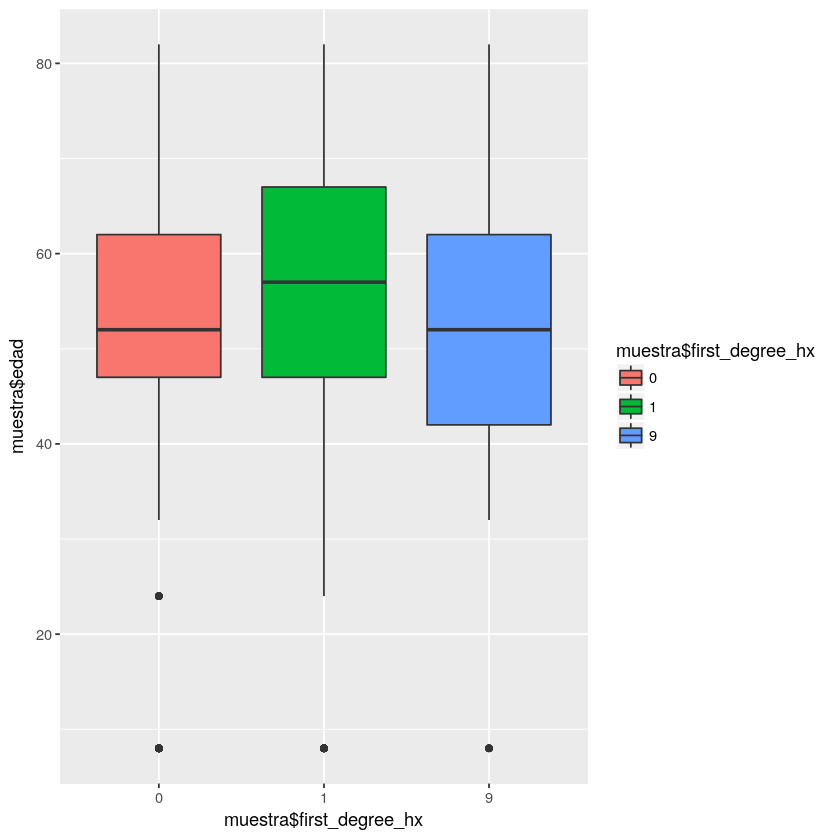

In [66]:
library(ggplot2)
ggplot(muestra,aes(y=edad,x=first_degree_hx,color=first_degree_hx))+geom_boxplot()

¿Existe una diferencia estadística significativa entre la edad de aparición del cancer y si hay antecedentes familiares? ¿Que test usarías para comprobarlo?

In [67]:
for (v in levels(muestra$first_degree_hx)){
    print(paste("Shapiro test: ",v,"pvalue:",
                shapiro.test(muestra$edad[muestra$first_degree_hx==v])$p.value))
}
print(paste("Bartlett test, pvalue:",
            bartlett.test(muestra$edad~muestra$first_degree_hx)$p.value))
print("Aplicamos test Wilcox porque la edad no sigue una gaussiana")

wtest<-wilcox.test(edad ~ first_degree_hx, data=muestra)

print(paste0("La edad de aparición del cancer depende de los antecedentes familiares porque el pvalor es muy bajo:",
    round(wtest$p.value,8)))

[1] "Historial con cancer en familiares. pvalor: 1.53240238627183e-34"

[1] "Historial sin cancer en familiares. pvalor: 9.63037678983155e-19"


	Welch Two Sample t-test

data:  muestra$edad[muestra$first_degree_hx == 0] and muestra$edad[muestra$first_degree_hx == 1]
t = -1.5609, df = 972, p-value = 0.1189
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -2.0256093  0.2308441
sample estimates:
mean of x mean of y 
 55.39163  56.28901 


#  <font color='red'>Comentario</font> 

El test de Welch no se puede aplicar si las muestras no siguen una distribución gaussiana como has demostrado.
Deberías haber usado un test de wilcox.

Dibuja la curva de densidad de probabilidad de cómo varía la edad de aparición del cancer en función de si ha habido antecedentes familiares o no.

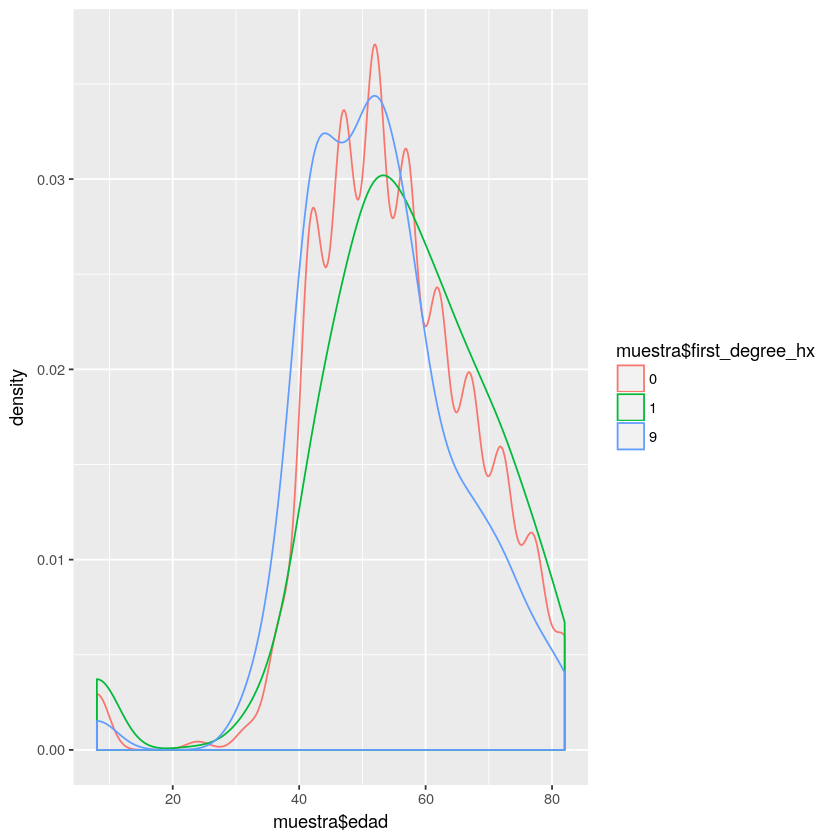

In [73]:
ggplot(muestra,aes(x=edad,color=first_degree_hx))+geom_density()

#### Edad y BIRADS

Representa en un diagrama de cajas cómo varía la edad de aparición del cancer en función de la densidad del cancder (BIRADS).

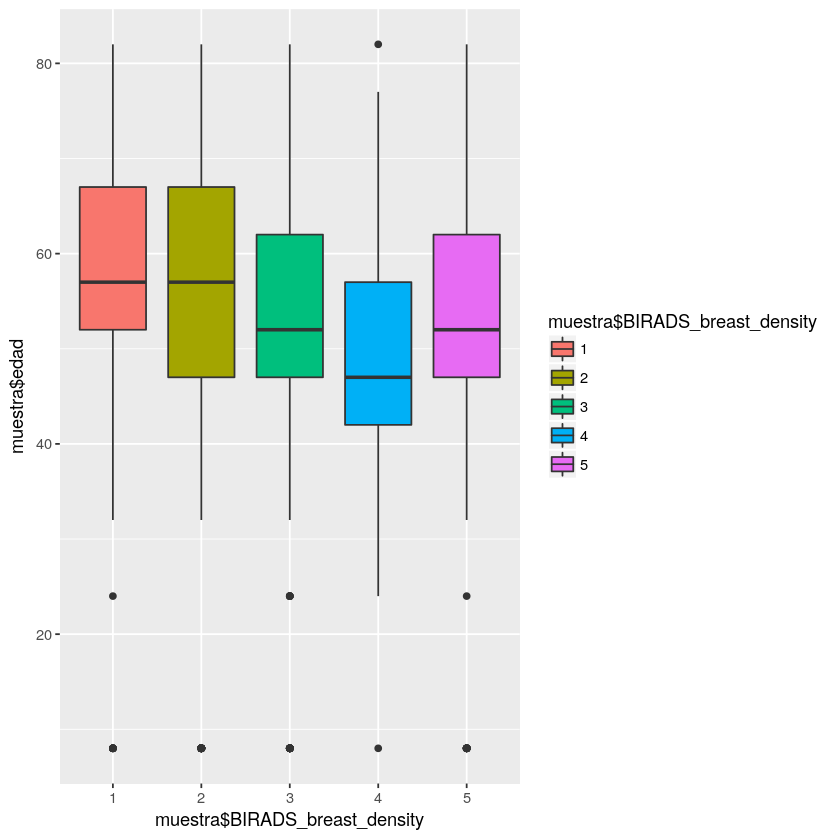

In [68]:
ggplot(muestra,aes(y=edad,x=BIRADS_breast_density,color=BIRADS_breast_density))+
    geom_boxplot()+ theme(axis.text.x = element_text(angle = 45, hjust = 1))

¿Existe una evidencia estadística significativa para decir que la edad en la que se detecta el cancer depende de la densidad del cancer (BIRADS)?

¿Que test habría que aplicar?

In [69]:
for (v in levels(muestra$BIRADS_breast_density)){
    print(paste("variable:",v,"pvalue:",
                shapiro.test(muestra$edad[muestra$BIRADS_breast_density==v])$p))    
}

kt<-kruskal.test(edad ~ BIRADS_breast_density, data=muestra)

print(paste("kruskal para el tipo de cancer (BIRADS)", 
"tiene una dependencia en la edad de aparición porque su p-valor es muy bajo:",
            kt$p.value))

                                Df Sum Sq Mean Sq F value Pr(>F)    
muestra$BIRADS_breast_density    4  16333    4083   24.36 <2e-16 ***
Residuals                     4995 837318     168                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Call:
   aov(formula = muestra$edad ~ muestra$BIRADS_breast_density, data = muestra)

Terms:
                muestra$BIRADS_breast_density Residuals
Sum of Squares                        16332.9  837318.5
Deg. of Freedom                             4      4995

Residual standard error: 12.94725
Estimated effects may be unbalanced

#  <font color='red'>Comentario</font> 


Deberías haber aplicado un test de shapiro y haber visto que no sigue una distribución guassiana por lo que no se puede aplicar ANOVA. En su lugar hay que aplicar *kruskal.test*

#### Tablas de contingencia: BIRADS

¿Todos los  tipos de cancer (BIRADS) son igual de probables? ¿Con que test lo comprobarías?

In [64]:
#Chi cuadrado, test de homogeneidad
cqt<-chisq.test(table(muestra$BIRADS_breast_density))

print("No todos los BIRADS son igual de probables porque el p-valor es muy bajo:")
cqt

Warning message in chisq.test(muestra$BIRADS_breast_density):
“Chi-squared approximation may be incorrect”

¿Cual es el tipo de cancer (BIRADS) más común? ¿Con qué proporción?

In [ ]:
sort(prop.table(table(muestra$BIRADS_breast_density)),decreasing = T)[1]

¿Depende el tipo de cancer (BIRADS) de si ha habido o no antecedentes familiares?

In [62]:
cqtest<-chisq.test(table(muestra$BIRADS_breast_density,muestra$first_degree_hx))
print(paste("El tipo de cancer (BIRADS) es independiente",
             "de si ha habido o no antecedentes familiares"))
print(paste("Aceptamos hipótesis nula (no hay relación entre ambos)",
             "porque el pvalor es muy alto:",cqtest$p.value))

                          Df Sum Sq Mean Sq F value Pr(>F)    
muestra$first_degree_hx    2    308  154.05   95.77 <2e-16 ***
Residuals               4997   8038    1.61                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

ERROR: Error in eval(expr, envir, enclos): object 'anovatestBIARDS' not found


¿Depende el tipo de cancer BIRADS del grupo étnico?

In [63]:
cqtest<-chisq.test(table(muestra$BIRADS_breast_density,muestra$race_eth),simulate.p.value = T)

print("El cancer (BIRADS) parece depender del grupo étnico del paciente")
print(paste("Rechazamos hipótesis nula (no hay relación)",
             "porque el pvalor es muy bajo:",cqtest$p.value))

                   Df Sum Sq Mean Sq F value Pr(>F)    
muestra$race_eth    1    118  118.19   71.79 <2e-16 ***
Residuals        4998   8228    1.65                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Call:
   aov(formula = muestra$BIRADS_breast_density ~ muestra$race_eth, 
    data = muestra)

Terms:
                muestra$race_eth Residuals
Sum of Squares           118.192  8227.952
Deg. of Freedom                1      4998

Residual standard error: 1.283062
Estimated effects may be unbalanced

In [ ]:
prop.table(table(muestra$race_eth,muestra$BIRADS_breast_density),margin = 1)

¿Cual es la probabilidad (con su margen de error del 95%) de que un *Native American* tenga un cancer de tipo *Almost entirely fat*?

*Aviso*: Cuidado con los NA

In [ ]:
muestraNative<-muestra[as.character(muestra$race_eth)=="Native American",
                  c("BIRADS_breast_density","race_eth")]
muestraNative<-na.omit(muestraNative)

ns<-sum(muestraNative$BIRADS_breast_density=="Almost entirely fat",na.rm=T)
n <-nrow(muestraNative)
print(paste("La probabilidad es del",ns/n))
ptconf<-prop.test(ns,n,conf.level = 0.95)$conf
print(paste0("El intervalo de confianza dado por la función prop.test es:[",
            ptconf[1],",",ptconf[2],"]"))

btconf<-binom.test(ns,n,conf.level = 0.95)$conf
print(paste0("El intervalo de confianza dado por la función binom.test es:[",
            btconf[1],",",btconf[2],"]"))

#  <font color='red'>Comentario</font> 


Hubiera estado bien que dieras una pequeña descripción de cual es la conclusión a la que llegamos tras aplicar cada test.